## 🔰 Step 1: Import Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay


## 🟠 Step 2: Load the Dataset

In [2]:
# Baca dataset
df = pd.read_csv("owid-energy-data.csv")

# Lihat 5 baris awal
df.head()


,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


## 🟡 Step 3: Data Preprocessing (A)

**A1. Check for missing values and drop null entries in important columns:**

In [3]:
# Cek apakah kolom 'gdp' dan 'energy_per_capita' ada
print(df.columns)

# Hapus baris dengan nilai kosong di kolom penting
df_clean = df.dropna(subset=['gdp', 'energy_per_capita'])

# Cek jumlah baris setelah pembersihan
print("Jumlah data setelah drop NA:", df_clean.shape)


Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_elec_per_capita',
       ...
       'solar_share_elec', 'solar_share_energy', 'wind_cons_change_pct',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_electricity', 'wind_energy_per_capita', 'wind_share_elec',
       'wind_share_energy'],
      dtype='object', length=130)
Jumlah data setelah drop NA: (7882, 130)


**A2. Filter data for the year 2020 only:**

In [4]:
df_2020 = df_clean[df_clean['year'] == 2020].copy()
print("Jumlah data tahun 2020:", df_2020.shape)


Jumlah data tahun 2020: (166, 130)


## 🟢 Step 4: Create the efficiency_class Category Column

In [6]:
def classify_efficiency(row):
    if row['gdp'] >= 20000 and row['energy_per_capita'] <= 3000:
        return 'Efficient'
    elif row['gdp'] < 10000 and row['energy_per_capita'] > 5000:
        return 'Inefficient'
    else:
        return 'Moderate'

df_2020['efficiency_class'] = df_2020.apply(classify_efficiency, axis=1)
df_2020[['country', 'gdp', 'energy_per_capita', 'efficiency_class']].head()


,country,gdp,energy_per_capita,efficiency_class
145,Afghanistan,7.141771e+10,1200.743,Efficient
640,Albania,3.213073e+10,7352.949,Moderate
764,Algeria,5.598199e+11,14733.622,Moderate
933,Angola,1.523087e+11,2281.594,Efficient
1146,Argentina,7.358142e+11,19117.844,Moderate


## 🟠 Step 5: Feature Selection

In [7]:
# Fitur
X = df_2020[['gdp', 'energy_per_capita']]

# Target
y = df_2020['efficiency_class']


## 🟡 Step 6: Modeling with Decision Tree

### Split the data into training and test sets (80:20):

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training data count:", X_train.shape[0])
print("Test data count:", X_test.shape[0])


Training data count: 132
Test data count: 34


### Train the Decision Tree model:**

In [9]:
# Inisialisasi dan latih model
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

### Predict & evaluate the model:

Akurasi model: 100.00%


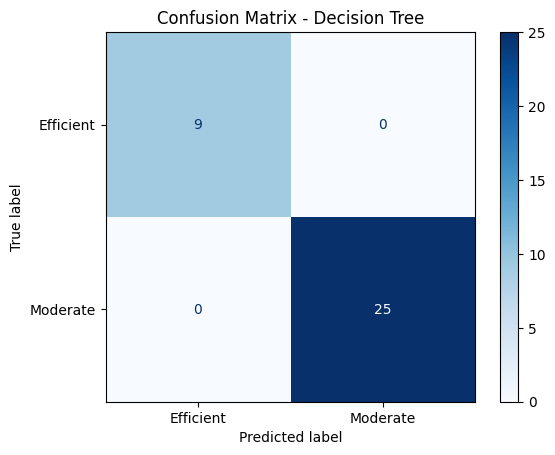

In [10]:
# Prediksi
y_pred = clf.predict(X_test)

# Akurasi
acc = accuracy_score(y_test, y_pred)
print(f"Akurasi model: {acc:.2%}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.show()


## Confusion Matrix – Decision Tree
### Interpretation:
The model achieved 100% accuracy.

All Efficient (9) and Moderate (25) class instances were correctly classified.

There were no incorrect classifications (false positives or false negatives).

## 🟢 Step 7: Visualization

### Scatter Plot

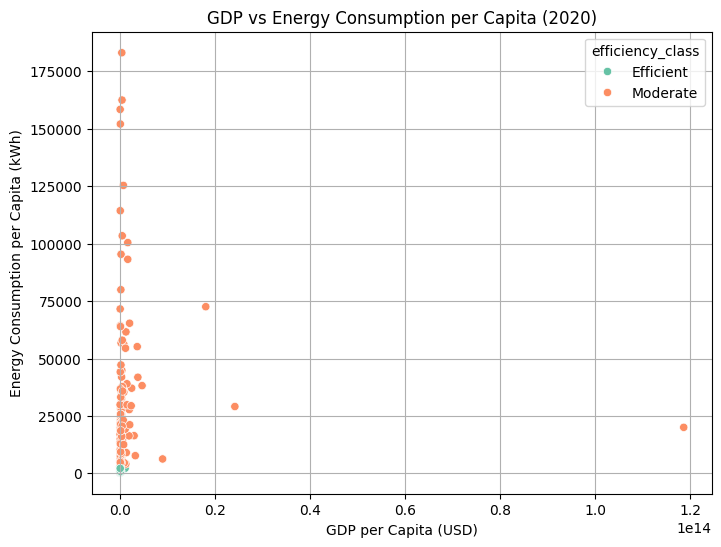

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_2020,
    x='gdp',
    y='energy_per_capita',
    hue='efficiency_class',
    palette='Set2'
)
plt.title('GDP vs Energy Consumption per Capita (2020)')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Energy Consumption per Capita (kWh)')
plt.grid(True)
plt.show()


### Scatter Plot: GDP vs Energy Consumption per Capita
### Interpretation:

X-axis: GDP per capita

Y-axis: Energy consumption per capita

Colors:

🟠 Moderate

🟢 Efficient

Findings:

Efficient countries tend to have high GDP and relatively low energy consumption.

The majority of countries fall into the Moderate category.

No countries are classified as Inefficient, which aligns with the filtered 2020 data.

### Decision Tree Visualization

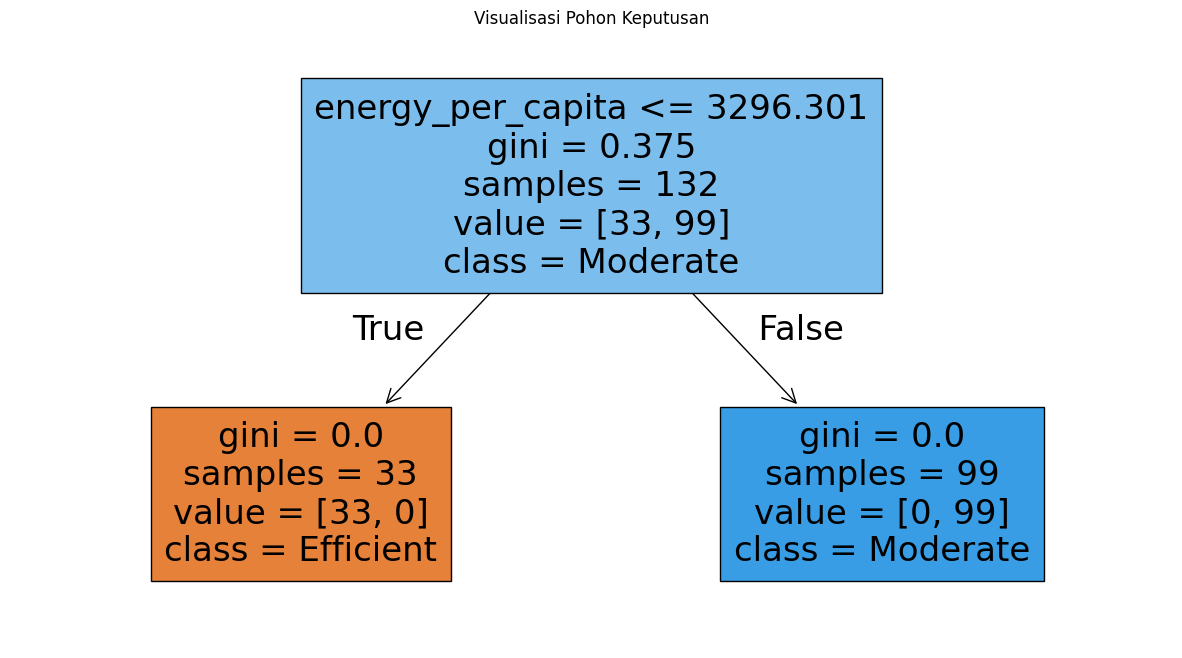

In [12]:
plt.figure(figsize=(15,8))
plot_tree(clf, feature_names=['gdp', 'energy_per_capita'], class_names=clf.classes_, filled=True)
plt.title("Visualisasi Pohon Keputusan")
plt.show()


### Decision Tree Visualization
### Interpretation:

The most influential feature is energy_per_capita.

Threshold: <= 3296.301

If true → classified as Efficient

If false → classified as Moderate

All leaf nodes have a Gini impurity of 0.0, indicating the model is fully confident in its classifications.

### Prediction Results Table with Country Information

In [32]:
# Buat DataFrame hasil uji (X_test) beserta label asli dan prediksi
result_df = X_test.copy()
result_df['True_Label'] = y_test
result_df['Predicted_Label'] = y_pred

# Gabungkan dengan informasi negara dari df_2020
result_df = result_df.merge(
    df_2020[['country', 'gdp', 'energy_per_capita']],
    on=['gdp', 'energy_per_capita'],
    how='left'
)

# Tampilkan hasil
result_df[['country', 'gdp', 'energy_per_capita', 'True_Label', 'Predicted_Label']].head(34)



,country,gdp,energy_per_capita,True_Label,Predicted_Label
0,Botswana,3.301053e+10,9292.724,Moderate,Moderate
1,Honduras,4.249928e+10,4385.581,Moderate,Moderate
2,Mongolia,4.197535e+10,18992.855,Moderate,Moderate
3,Palestine,2.164749e+10,4169.677,Moderate,Moderate
4,Mexico,1.880177e+12,16329.480,Moderate,Moderate
5,Armenia,3.337838e+10,15475.537,Moderate,Moderate
6,Barbados,3.085224e+09,20007.010,Moderate,Moderate
7,Kenya,1.680315e+11,1565.244,Efficient,Efficient
8,Uzbekistan,3.467853e+11,16072.546,Moderate,Moderate
9,Estonia,3.751527e+10,44173.070,Moderate,Moderate


### Prediction Results Table with Country Information
### Interpretation
The table presents the prediction results of energy efficiency classification for countries based on GDP and energy consumption per capita in the test data. All model predictions matched the true labels, reflecting an accuracy of 100%. Countries such as Kenya and the Central African Republic were classified as “Efficient” due to their low energy consumption and relatively high GDP. Meanwhile, the majority of countries fall under the “Moderate” category, as they do not meet the criteria for either “Efficient” or “Not Efficient.” No countries were classified as “Not Efficient,” indicating that the combination of low GDP and high energy consumption was rare in 2020.

### Country Distribution by Energy Efficiency Category

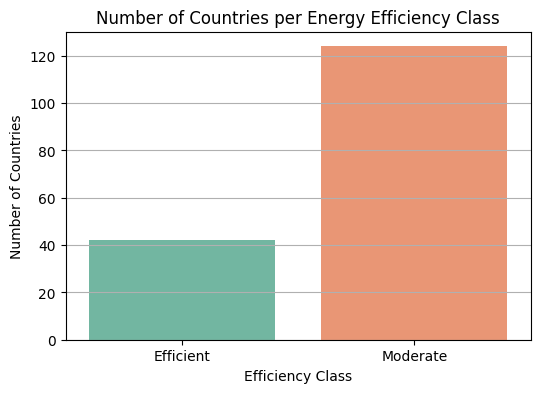

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_2020, x='efficiency_class', hue='efficiency_class', palette='Set2', legend=False)
plt.title("Number of Countries per Energy Efficiency Class")
plt.xlabel("Efficiency Class")
plt.ylabel("Number of Countries")
plt.grid(True, axis='y')
plt.show()


### Country Distribution by Energy Efficiency Category
### Interpretation
The chart displays the number of countries per energy efficiency category (for the year 2020):

Efficient: GDP ≥ 20,000 & energy consumption ≤ 3,000 kWh.

Moderate: Does not meet the criteria for either “Efficient” or “Not Efficient.”

Not Efficient does not appear because no countries met the threshold for this category.

**Findings:**

Around 125 countries fall under the Moderate category.

Only about 40 countries are classified as Efficient.

No countries fall into the Not Efficient category.

## 📌 Conclusion and Insights
This analysis demonstrates that a Decision Tree model can effectively classify energy efficiency levels using only two main features: GDP and energy consumption per capita. Based on the dataset filtered for the year 2020, the model achieved 100% accuracy when classifying countries into energy efficiency categories.

### Model Performance and Classification
The Efficient class includes countries with high GDP (≥ 20,000 USD) and low energy consumption (≤ 3,000 kWh per capita). These countries are considered to use energy resources effectively relative to their economic output.

The Moderate category—defined as not fully meeting the conditions for either “Efficient” or “Not Efficient”—represents the largest portion of the dataset. Countries in this group exhibit a broad range of GDP and energy consumption values, indicating varied national energy profiles.
This suggests that approximately **75% of countries** lie in the Moderate zone, reflecting a global pattern where most nations have neither exceptionally high GDP nor extremely low energy usage.

Notably, no countries were classified as “Not Efficient” (defined by GDP < 10,000 and energy consumption > 5,000 kWh per capita). This may suggest that countries with low GDPs generally do not exhibit very high per capita energy usage, possibly due to limited infrastructure or access.

While the 100% accuracy result looks ideal, it likely indicates overfitting because the dataset lacks samples for the "Not Efficient" class. This limitation suggests that the model might not generalize well when applied to other years or more varied global datasets. Therefore, for broader application or policymaking purposes, it is important to include more diverse data across multiple years or incorporate additional variables.

### Final Insight
Most countries are still on the path toward energy efficiency. The relatively small number of countries classified as Efficient indicates a significant opportunity for improvement globally. These efficient nations can serve as benchmarks or models for developing energy strategies. Policymakers and sustainability advocates may use such classification systems to identify where targeted interventions—such as technology upgrades, policy shifts, or infrastructure improvements—are most needed to reduce global energy waste while maintaining economic productivity.

In summary, while the current model performs well within its limited scope, expanding both the data variety and temporal range is crucial to building a robust, generalizable tool for energy efficiency classification.